### **Collected Data is imblanced dataset from GTZAN**
***In this dataset we have 10 genres ('Jazz', 'Pop', 'Classical', 'Hip -pop', Blah Blah)***

***Each files contain 100 .wav files of 30 sec audio***

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

# Seaborn visualization setup
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [21]:
# Path to the nested folder structure
audio_files = glob('genres_original/*/*.wav') 

## **Oversample Minority Classes**                ## ye wala part skip kr sakte ho mei gtzan wala utha liya 

***Using oversample minority classes to balance the dataset to prevent bias towards majority classes during model training.***

***Beneficial because balanced datasets help models learn more effectively from minority classes, leading to better generalization.***


In [ ]:
# # Oversample files
# oversampled_files = []
# for genre, count in genre_file_count.items():
#     genre_path = os.path.join(base_path, genre)
#     genre_files = glob(os.path.join(genre_path, '*.wav'))
#     if count < max_count:
#         oversampled_files.extend(genre_files)
#         # Duplicate files to match the max_count
#         oversampled_files.extend(resample(genre_files, replace=True, n_samples=max_count - count))
#     else:
#         oversampled_files.extend(genre_files)

# print(f"Total files after oversampling: {len(oversampled_files)}")

## **Plotting the first audio file**

In [22]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.00732422  0.01660156  0.00762939 -0.00350952 -0.0022583  -0.0093689
 -0.02267456 -0.02236938 -0.03128052 -0.04330444]
shape y: (661794,)
sr: 22050


## ***Apply data augmentation***

In [23]:
def augment_audio(y, sr):
    # Pitch shifting
    y_pitch_shifted = librosa.effects.pitch_shift(y, sr, n_steps=4)
    # Time stretching
    y_time_stretched = librosa.effects.time_stretch(y, 1.5)
    # Adding noise
    noise = np.random.randn(len(y))
    y_noisy = y + 0.005 * noise
    return [y_pitch_shifted, y_time_stretched, y_noisy]

# Plot the first audio file
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.00732422  0.01660156  0.00762939 -0.00350952 -0.0022583  -0.0093689
 -0.02267456 -0.02236938 -0.03128052 -0.04330444]
shape y: (661794,)
sr: 22050


## **Plotting Raw audio** 

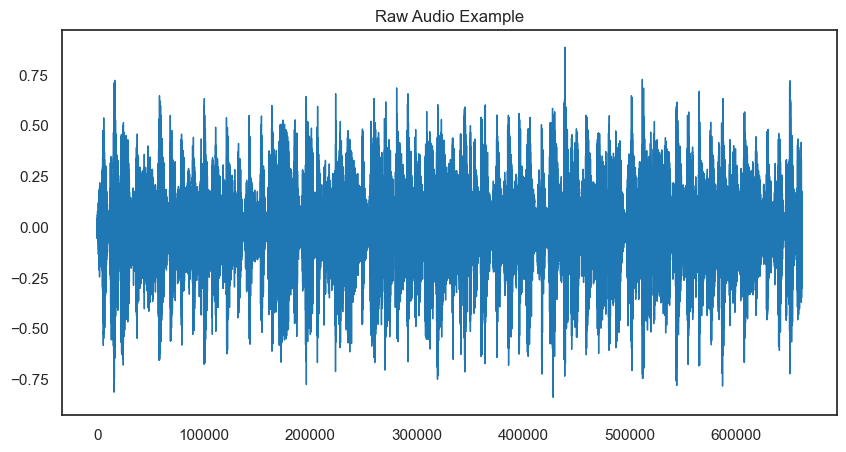

In [24]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1, 
                  title='Raw Audio Example', 
                  color=color_pal[0])

plt.show()

## **Trim leading/lagging silence**
***Here we removing the first few seconds audio which can cause trouble***

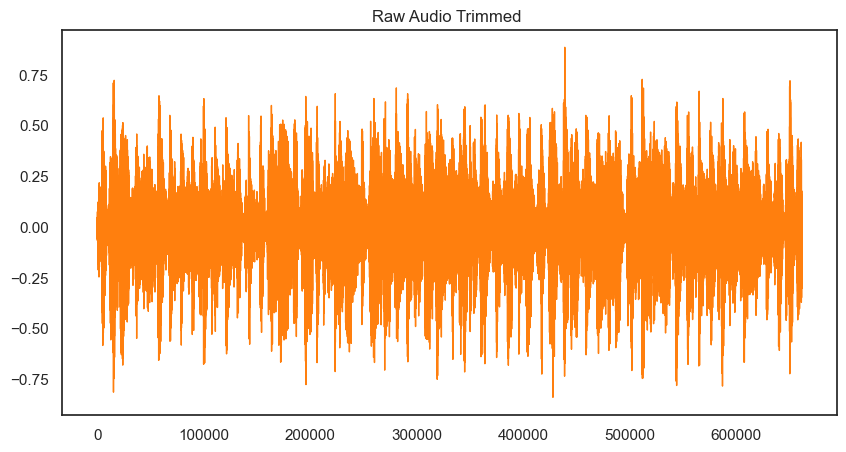

In [25]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5), 
                          lw=1, title='Raw Audio Trimmed ', 
                          color=color_pal[1])

plt.show()

## **Zoomed-in view of raw audio**

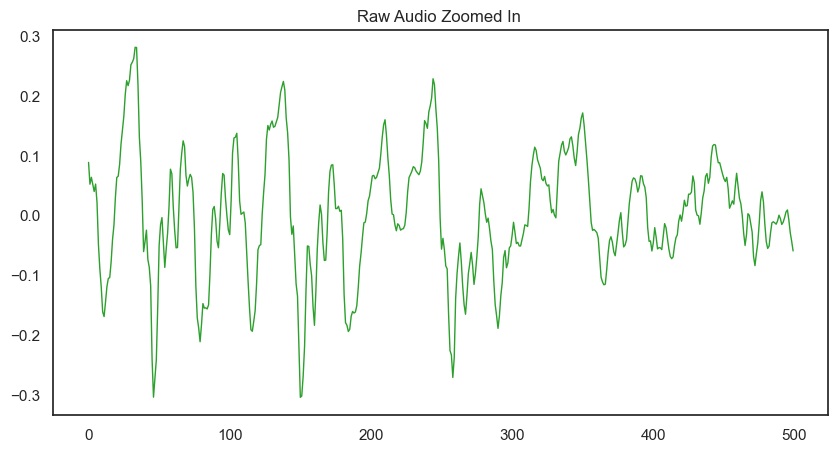

In [26]:

pd.Series(y[30000:30500]).plot(figsize=(10, 5), 
                              lw=1, title='Raw Audio Zoomed In ', 
                              color=color_pal[2])

plt.show()

## **Spectrogram**
***Helps in transforming the time domain (raw audio waveform) to the frequency domain helps us understand the different frequency components present in the audio signal***


The Short-Time Fourier Transform (STFT) is used here to analyze the signal in short overlapping time segments

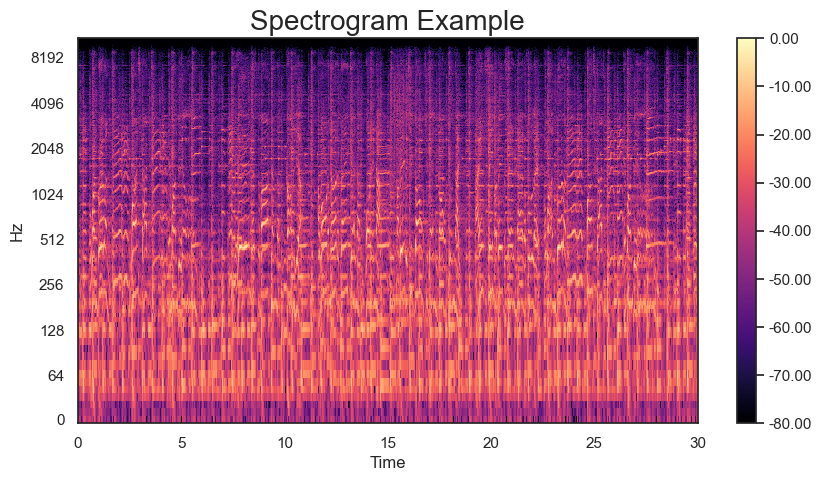

In [27]:
D = librosa.stft(y)

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## **Mel Spectogram** mfcc

In [28]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

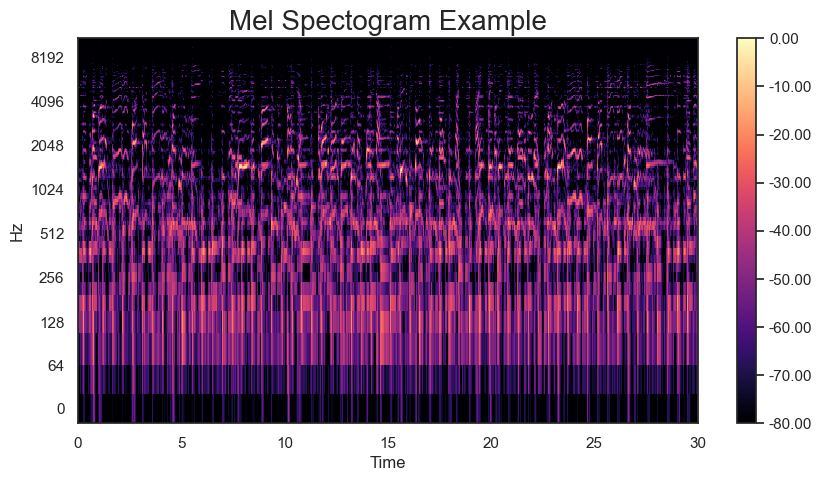

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## ***Normalisation*** ye or add krna h 